In [114]:
import autograd.numpy as np
from autograd import elementwise_grad
import numpy.linalg as la
from scipy.sparse import spdiags

import matplotlib.pyplot as plt
colors = [(0,0.4,1),(1,0.7,0.3),(0.2,0.7,0.2),(0.8,0,0.2),(0.5,0.3,.9)]

In [134]:
# Parameters
eta = 6.0
gamma = 1.0

t_max = 2
c = 1.4 # the speed and two times the height of the wave
P = 20  # period
M = 100  # number of spatial points
N = 100 # number of temporal points

In [135]:
# Utility functions
def grid(P=20, M=100):
    dx = P/M
    x = np.linspace(0, P-dx, M)
    return x, dx

sech = lambda a: 1/np.cosh(a) # sech isn't defined in NumPy

# Simple analytic Soliton

In [136]:
x, dx = grid(P, M)
u_soliton = lambda x, t: 1/2*c*sech(np.abs((x-c*t) % P - P/2))**2

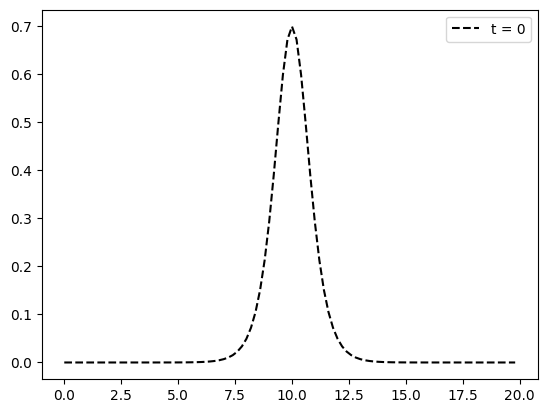

In [137]:
plt.plot(x, u_soliton(x, 0), 'k--', label='t = 0'); plt.legend();

# Non-analytic Solitons

In [8]:

g = lambda x, t: 0
f = lambda u, t: -np.matmul(D1, .5*eta*u**2 + gamma**2*np.matmul(D2,u)) + g(x, t)
Df = lambda u: -np.matmul(D1, eta*np.diag(u) + gamma**2*D2)


In [9]:
# Utility functions
def difference_matrices(P=20, M=100):
    dx = P/M
    e = np.ones(M) # unit vector of length M
    # 1st order central difference matrix:
    D1 = .5/dx*spdiags([e,-e,e,-e], np.array([-M+1,-1,1,M-1]), M, M).toarray()
    # 2nd order central difference matrix:
    D2 = 1/dx**2*spdiags([e,e,-2*e,e,e], np.array([-M+1,-1,0,1,M-1]), M, M).toarray()
    return D1, D2

def midpoint_method(u, un, t ,f ,Df ,dt ,M ,tol ,max_iter):
    '''
    Integrating one step of the ODE u_t = f, from u to un,
    with the implicit midpoint method
    Using Newton's method to find un
    '''
    I = np.eye(M)
    F = lambda u_hat: 1/dt*(u_hat-u) - f((u+u_hat)/2, t+.5*dt)
    J = lambda u_hat: 1/dt*I - 1/2*Df((u+u_hat)/2)
    err = la.norm(F(un))
    it = 0
    while err > tol:
        un = un - la.solve(J(un),F(un))
        err = la.norm(F(un))
        it += 1
        if it > max_iter:
            break
    return un

In [197]:
def initial_condition_kdv(x, k1, k2, eta):
    M = x.size
    P = int((x[-1]-x[0])*M/(M-1))

    d1, d2 = .25, .5
    sech = lambda a: 1/np.cosh(a) # sech isn't defined in NumPy
    u0 = 0
    u0 += (-6./-eta)*2 * k1**2 * sech(np.abs(k1 * ((x+P/2-P*d1) % P - P/2)))**2
    u0 += (-6./-eta)*2 * k2**2 * sech(np.abs(k2 * ((x+P/2-P*d2) % P - P/2)))**2
    u0 = np.concatenate([u0[M:], u0[:M]], axis=-1)
    return u0

In [200]:
# Parameters
eta = 6.0
gamma = 1.0

t_max = 5
c = 2 # the speed and two times the height of the wave
P = 20  # period
M = 100  # number of spatial points
N = 100 # number of temporal points

k1, k2 = 1., .75 # should be uniformly random
# Grids
x, dx = grid(P, M) # spatial grid
t, dt = grid(t_max, N) # temporal grid

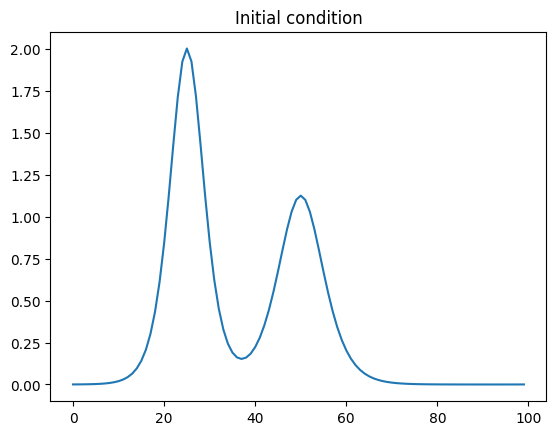

In [201]:
D1, D2 = difference_matrices(P,M)
u0 = initial_condition_kdv(x, k1, k2, eta)
plt.plot(u0); plt.title('Initial condition');

In [202]:
u = np.zeros([t.shape[0], u0.shape[-1]])
u[0, :] = u0
# The implicit midpoint method:
for i, t_step in enumerate(t[:-1]):
    u[i+1,:] = midpoint_method(u[i,:], u[i,:], t[i], f, Df, dt, M, 1e-12, 5)

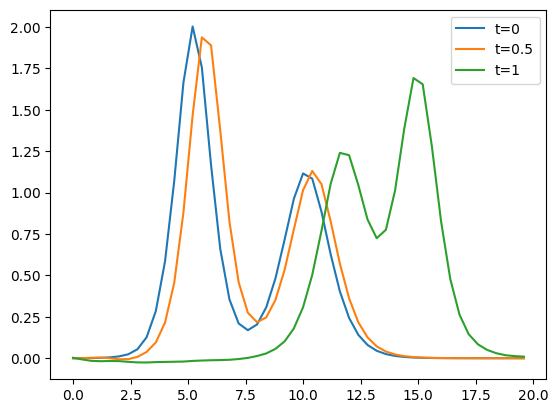

In [19]:
# Plotting animation saved as a gif
import matplotlib.animation as animation

In [237]:
M = 10
e = np.ones(M) # unit vector of length M
Dp = spdiags([e,-e,e,-e], np.array([-M+1,-1,1,M-1]), M, M).toarray() # Foward difference matrix
torch.tensor(Dp)

tensor([[ 0.0000,  0.1000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, -0.1000],
        [-0.1000,  0.0000,  0.1000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -0.1000,  0.0000,  0.1000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000, -0.1000,  0.0000,  0.1000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, -0.1000,  0.0000,  0.1000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000, -0.1000,  0.0000,  0.1000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.1000,  0.0000,  0.1000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.1000,  0.0000,
          0.1000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, -0.1000,
          0.0000,  0.1000],
        [ 0.1000,  

In [231]:
Dp

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.]])

In [227]:
import torch
import torch

# Define the parameters
M = 5

# Create the e tensor
e = torch.ones((M,), dtype=torch.float)

# Create the indices tensor
indices = torch.tensor([[-M+1,-1,1,M-1]], dtype=torch.long)

# Create the values tensor
values = torch.tensor([e, -e, -e, e])

# Create the Dp tensor
Dp = torch.sparse_coo_tensor(indices, values, (M,M)).to_dense()


ValueError: only one element tensors can be converted to Python scalars